AMRUTHA KANAKATTE RAVISHANKAR; 
    CWID :20027346

Q6. Load the “UCI_liver_cirrhosis.CSV” dataset, from the raw_data module in CANVAS, into Python (see the data dictionary at the bottom of this document). This is a dataset used for predicting “Liver problems” in patients. Construct a knn model to classify Liver Problems (Selector) based only on the “Age”,”Gender”, “DB”, “Alkphos” , “TP” and “A_G_Ratio”.

In [1]:
#Import all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the required data file
df=pd.read_csv('UCI_liver_cirrhosis.csv')
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A_G_ratio,Selector,Gender_ind,Age_quartiles,A_G_Cat
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,age_Q4,A_G_cat2
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,age_Q4,A_G_cat1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,age_Q4,A_G_cat2
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,age_Q3,A_G_cat2
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,age_Q4,A_G_cat1


In [3]:
#Drop all the missing values
df.dropna(inplace=True)

In [4]:
# Encode categorical variables (Gender and A_G_Ratio)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['A_G_ratio'] = le_gender.fit_transform(df['A_G_ratio'])

In [5]:
# Feature selection based on the given columns
features = ['Age', 'Gender', 'DB', 'Alkphos', 'TP', 'A_G_ratio']
target = 'Selector'

X = df[features]
y = df[target]

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build the KNN model (let k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Predictions
y_pred = knn_model.predict(X_test_scaled)

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.77      0.76       124
           2       0.36      0.32      0.34        50

    accuracy                           0.64       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.63      0.64      0.64       174

Accuracy Score:
0.6436781609195402
Confusion Matrix:
[[96 28]
 [34 16]]


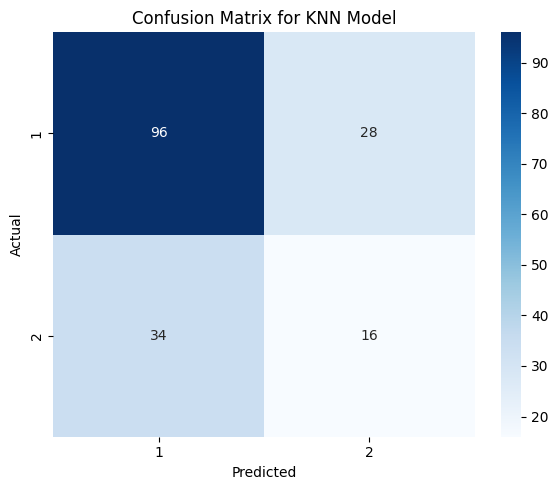

In [10]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()